In [1]:
import pandas as pd
import statsmodels.api as sm # 회귀 분석
import matplotlib.pyplot as plt
import numpy as np # 선형 대수
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF 분석
import random

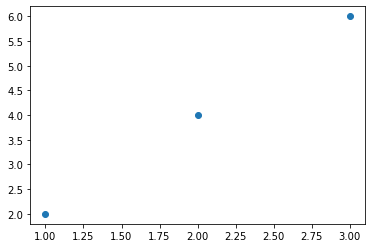

In [2]:
x = [1,2,3]
y = [2,4,6]
plt.scatter(x,y)

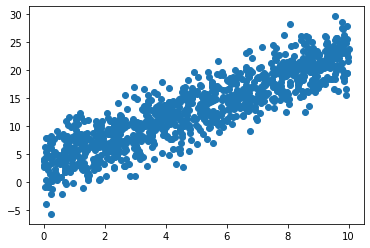

In [3]:
# y = 2x + 3
# random.gauss(평균, 표준 편차)
x1 = []
y1 = []
for i in range(1000):
    imsi = random.random() * 10
    x1.append(imsi)
    y1.append(2*imsi + random.gauss(3,3))
plt.scatter(x1,y1)

(range(0, 11), [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23])

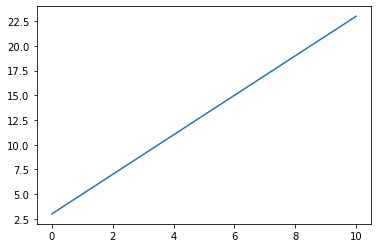

In [4]:
x2 = range(11)
y2 = [2*n +3 for n in range(11)]
plt.plot(x2, y2)
x2,y2

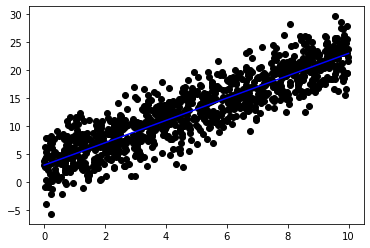

In [5]:
plt.scatter(x1,y1, c="black")
plt.plot(x2,y2, c= "blue")
plt.show()

In [6]:
X = sm.add_constant(x1) # x축 설정
model = sm.OLS(y1,X) # OLS 모델 분석 (종속변수, 독립변수)
result = model.fit() # 회귀모형 계산

print(result.summary()) # 결과 출력

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     3789.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:27:44   Log-Likelihood:                -2512.9
No. Observations:                1000   AIC:                             5030.
Df Residuals:                     998   BIC:                             5040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0478      0.186     16.370      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

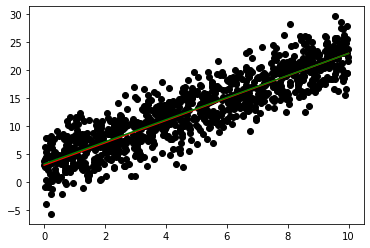

In [7]:
x3 = range(11)
y3 = [1.9779 * n + 3.2172 for n in x3]
plt.scatter(x1, y1, c = "black")
plt.plot (x2, y2, c="red")
plt.plot (x3, y3, c ="green")
plt.show

In [8]:
score1 = 0
score2 = 0
for a, i in enumerate(x1):
    score1 += (y1[a] - (2 * i +3)) ** 2
    score2 += (y1[a] - (1.9779 * i + 3.2172)) ** 2
print(score1/len(x1))
print(score2/len(x1))

8.917480897733046
8.929819856662077


In [9]:
x4 = []
x4_1 = []
y4 = []
for i in range(1000):
    imsi = random.random() * 10
    x4.append(imsi)
    x4_1.append(imsi + random.gauss(0,1))
    y4.append(2*imsi + random.gauss(3,2))
    
df = {"x4" : x4, "x4_1" : x4_1, "y4" : y4}
df = pd.DataFrame(df)

x4 = df[["x4", "x4_1"]] # 다중 공산성 X4_1 데이터 사용안함
y4 = df["y4"]

x4 = sm.add_constant(x4, has_constant = "add")
model = sm.OLS(y4, x4)
result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     4196.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:27:44   Log-Likelihood:                -2117.4
No. Observations:                1000   AIC:                             4241.
Df Residuals:                     997   BIC:                             4256.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9030      0.126     23.036      0.0

In [10]:
df.corrwith(df["x4"]) # 상관계수


x4      1.000000
x4_1    0.947066
y4      0.945395
dtype: float64

In [11]:
df.corr() # 상관계수 행렬

,x4,x4_1,y4
x4,1.000000,0.947066,0.945395
x4_1,0.947066,1.000000,0.893288
y4,0.945395,0.893288,1.000000


In [12]:
# VIF
for i in range(len(model.exog_names)):
    print(model.exog_names[i], variance_inflation_factor(model.exog, i))

const 3.9163983237500064
x4 9.702606599166005
x4_1 9.702606599166005
